In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [3]:
data_all = pd.read_excel("CAPCOAL T&S Cycle Data - static - v3 2.xlsx")

In [30]:
data = data_all.copy()

In [31]:
pd.options.display.max_columns = 1000

In [32]:
data.head(20)

,Site,Reporting_Year,Period_Code,Week_Code,Date,Shift_Name,Crew_Name,Loader_Personnel_No,Truck_Personnel_No,Loader,Loader_Fleet,Truck,Truck_Fleet,Material_Code,Material_Class_Description,Material_Group_Description,Material_Grade_Name,Dig_Location,Src_Location,Src_Location_Type,Destination_Location,Dest_Location_Type,Figure_Type_Code,Load_Tonnes,Load_Volume,Load_Count,Measured_Tonnes,Measured_Count,Time_Depart,Time_Arrive,Time_Spotting,Time_Haul,Time_Load,Time_Dump,Time_Queing,Time_Empty,Time_End_Cycle,Full_Cycle_Duration,Travel_Full_Duration,Travel_Empty_Duration,Load_Duration,Load_Queue_Duration,Load_Spot_Duration,Dump_Queue_Duration,Dump_Duration,Travel_Distance,Travel_Distance_Hauling,Loader_Passes,Load_Northing,Load_Easting,Load_Elevation,Dump_Northing,Dump_Easting,Dump_Elevation,SRC_Reference,Source_Record_Updated,Date_Last_Refreshed
0,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,221.0,1,2018-04-02 18:47:04,2018-04-02 18:53:19,2018-04-02 18:56:03,2018-04-02 18:58:40,2018-04-02 18:56:37,2018-04-02 19:09:07,2018-04-02 19:09:02,2018-04-02 19:09:28,2018-04-02 19:10:20,1396.0,622.0,375.0,123.0,164.0,34.0,5.0,73.0,5884.0,5196.0,NaN,7.454651e+06,677828.1295,195.20,7.452294e+06,680554.9651,203.79,2929575.0,2018-04-02 19:10:25.000,2018-05-18 04:40:22.557
1,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,207.0,1,2018-04-02 19:10:20,2018-04-02 19:16:36,2018-04-02 19:23:26,2018-04-02 19:26:10,2018-04-02 19:23:49,2018-04-02 19:37:01,2018-04-02 19:35:52,2018-04-02 19:37:17,2018-04-02 19:38:14,1674.0,582.0,376.0,141.0,410.0,23.0,69.0,73.0,5884.0,5196.0,NaN,7.454653e+06,677825.2513,203.70,7.452296e+06,680558.0666,203.50,2929597.0,2018-04-02 19:38:15.000,2018-05-18 04:40:22.557
2,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,248.0,1,2018-04-02 21:07:45,2018-04-02 21:17:30,2018-04-02 21:21:43,2018-04-02 21:23:35,2018-04-02 21:22:00,2018-04-02 21:34:20,2018-04-02 21:34:15,2018-04-02 21:34:34,2018-04-02 21:35:31,1666.0,640.0,585.0,95.0,253.0,17.0,5.0,71.0,5196.0,5196.0,NaN,7.454631e+06,677810.8061,206.40,7.452320e+06,680582.6195,209.20,2929675.0,2018-04-02 21:35:36.000,2018-05-18 04:40:22.557
3,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,254.0,1,2018-04-03 00:19:56,2018-04-03 00:29:16,2018-04-03 00:29:19,2018-04-03 00:32:04,2018-04-03 00:29:36,2018-04-03 00:42:32,2018-04-03 00:42:25,2018-04-03 00:42:43,2018-04-03 00:43:47,1431.0,621.0,560.0,148.0,3.0,17.0,7.0,75.0,5196.0,5196.0,NaN,7.454627e+06,677805.6260,194.59,7.452292e+06,680571.6905,196.70,2929766.0,2018-04-03 00:43:49.000,2018-05-18 04:40:22.557
4,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD553,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,243.0,1,2018-04-03 01:32:11,2018-04-03 01:51:31,2018-04-03 01:51:33,2018-04-03 01:53:14,2018-04-03 01:51:51,2018-04-03 02:03:10,2018-04-03 02:03:05,2018-04-03 02:03:35,2018-04-03 02:04:31,1940.0,591.0,1160.0,83.0,2.0,18.0,5.0,81.0,5318.0,5196.0,NaN,7.454618e+06,677817.6580,199.09,7.452281e+06,680575.1356,198.90,2929810.0,2018-04-03 02:04:40.000,2018-05-18 04:40:22.557
5,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD553,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,247.0,1,2018-04-03 05:04:15,2018-04-03 05:13:53,2018

In [33]:
data.columns

Index(['Site', 'Reporting_Year', 'Period_Code', 'Week_Code', 'Date',
       'Shift_Name', 'Crew_Name', 'Loader_Personnel_No', 'Truck_Personnel_No',
       'Loader', 'Loader_Fleet', 'Truck', 'Truck_Fleet', 'Material_Code',
       'Material_Class_Description', 'Material_Group_Description',
       'Material_Grade_Name', 'Dig_Location', 'Src_Location',
       'Src_Location_Type', 'Destination_Location', 'Dest_Location_Type',
       'Figure_Type_Code', 'Load_Tonnes', 'Load_Volume', 'Load_Count',
       'Measured_Tonnes', 'Measured_Count', 'Time_Depart', 'Time_Arrive',
       'Time_Spotting', 'Time_Haul', 'Time_Load', 'Time_Dump', 'Time_Queing',
       'Time_Empty', 'Time_End_Cycle', 'Full_Cycle_Duration',
       'Travel_Full_Duration', 'Travel_Empty_Duration', 'Load_Duration',
       'Load_Queue_Duration', 'Load_Spot_Duration', 'Dump_Queue_Duration',
       'Dump_Duration', 'Travel_Distance', 'Travel_Distance_Hauling',
       'Loader_Passes', 'Load_Northing', 'Load_Easting', 'Load_Elevation

In [34]:
data["Loader_Personnel_No"].value_counts()

 1222991      6165
 464701622    5199
 468390923    4760
 1395317      4300
 471974965    4143
 464450602    4056
 471894808    4052
 473220440    3764
 465044734    3541
 472807566    3295
 473232529    3069
 465542539    2958
 1323399      2771
 72355437     2754
 473248776    2739
 464463307    2660
 465507119    2650
 1307229      2595
 473203038    2520
 473237457    2318
 470580187    2300
 473128579    2219
 1276891      1867
 473135663    1769
 464094708    1695
 472852842    1537
 72200359     1534
 1223222      1355
 1237698      1284
 464395624     762
-77            705
 72419732      632
 1222606       615
 1428119       541
 472674587     516
 75462233      264
 72194969      201
 473344487     181
 470998451     152
 75662895      121
 463645798     116
 463627395      23
 465590510       7
 427504          5
 72420271        3
 1090628         2
Name: Loader_Personnel_No, dtype: int64

In [35]:
data.tail(20)

,Site,Reporting_Year,Period_Code,Week_Code,Date,Shift_Name,Crew_Name,Loader_Personnel_No,Truck_Personnel_No,Loader,Loader_Fleet,Truck,Truck_Fleet,Material_Code,Material_Class_Description,Material_Group_Description,Material_Grade_Name,Dig_Location,Src_Location,Src_Location_Type,Destination_Location,Dest_Location_Type,Figure_Type_Code,Load_Tonnes,Load_Volume,Load_Count,Measured_Tonnes,Measured_Count,Time_Depart,Time_Arrive,Time_Spotting,Time_Haul,Time_Load,Time_Dump,Time_Queing,Time_Empty,Time_End_Cycle,Full_Cycle_Duration,Travel_Full_Duration,Travel_Empty_Duration,Load_Duration,Load_Queue_Duration,Load_Spot_Duration,Dump_Queue_Duration,Dump_Duration,Travel_Distance,Travel_Distance_Hauling,Loader_Passes,Load_Northing,Load_Easting,Load_Elevation,Dump_Northing,Dump_Easting,Dump_Elevation,SRC_Reference,Source_Record_Updated,Date_Last_Refreshed
90695,CAPCOAL,2018,201807,201827,2018-07-03,Day,Production D,1222991,1306690,SH101,P & H 4100XPB,RD707,Komatsu 830E AC,Overburden,Waste,Overburden,X2_19_N_OB,X2_19_N,X2,Pit,X1_RL190_DUMP,Dump,ACTUAL,218.5,95.0,1,250.000000,1,2018-07-03 08:42:30,2018-07-03 08:49:32,2018-07-03 08:50:39,2018-07-03 08:53:49,2018-07-03 08:52:21,2018-07-03 08:56:49,2018-07-03 08:56:49,2018-07-03 08:56:49,2018-07-03 08:57:30,900.0,180.0,422.0,88.0,67.0,102.0,0.0,41.0,4211.0,242.0,NaN,7.454935e+06,677530.1170,199.08,7.454978e+06,677610.9981,196.36,3020343.0,2018-07-03 08:57:39,2018-07-14 04:21:35.640
90696,CAPCOAL,2018,201807,201827,2018-07-03,Day,Production D,1222991,1306690,SH101,P & H 4100XPB,RD707,Komatsu 830E AC,Overburden,Waste,Overburden,X2_19_N_OB,X2_19_N,X2,Pit,X1_RL190_DUMP,Dump,ACTUAL,218.5,95.0,1,209.000000,1,2018-07-03 08:57:30,2018-07-03 08:57:32,2018-07-03 08:58:53,2018-07-03 09:01:33,2018-07-03 09:00:43,2018-07-03 09:12:55,2018-07-03 09:10:32,2018-07-03 09:13:14,2018-07-03 09:13:56,986.0,539.0,2.0,50.0,81.0,110.0,143.0,61.0,429.0,3667.0,NaN,7.454952e+06,677544.8177,195.94,7.453994e+06,676838.5669,250.69,3020363.0,2018-07-03 09:13:59,2018-07-14 04:21:35.640
90697,CAPCOAL,2018,201807,201827,2018-07-02,Day,Production B,1222606,472458448,EX303,RH340,RD531,TRUCK CAT 793 REAR DUMP,Overburden,Waste,Overburden,X4_19_N_OB,X4_19_N,X4,Pit,RING_ROAD_RL160_DUMP,Dump,ACTUAL,213.9,93.0,1,255.100006,1,2018-07-02 12:48:47,2018-07-02 12:55:56,2018-07-02 12:56:26,2018-07-02 12:58:30,2018-07-02 12:56:44,2018-07-02 13:07:30,2018-07-02 13:07:30,2018-07-02 13:08:11,2018-07-02 13:09:02,1215.0,540.0,429.0,106.0,30.0,18.0,0.0,92.0,3670.0,3670.0,NaN,7.450991e+06,680933.7381,158.70,7.449745e+06,679734.0378,208.90,3019733.0,2018-07-02 13:09:07,2018-07-14 04:21:35.640
90698,CAPCOAL,2018,201807,201827,2018-07-02,Day,Production B,1222606,472458448,EX303,RH340,RD531,TRUCK CAT 793 REAR DUMP,Overburden,Waste,Overburden,X4_19_N_OB,X4_19_N,X4,Pit,RING_ROAD_RL160_DUMP,Dump,ACTUAL,213.9,93.0,1,250.899994,1,2018-07-02 14:47:28,2018-07-02 14:55:37,2018-07-02 14:56:08,2018-07-02 14:58:25,2018-07-02 14:56:25,2018-07-02 15:07:34,2018-07-02 15:07:34,2018-07-02 15:07:51,2018-07-02 15:08:55,1287.0,549.0,489.0,120.0,31.0,17.0,0.0,81.0,3670.0,3670.0,NaN,7.450969e+06,680903.9159,166.40,7.449871e+06,679601.9711,215.60,3019873.0,2018-07-02 15:09:00,2018-07-14 04:21:35.640
90699,CAPCOAL,2018,201804,201814,2018-04-02,Day,Production B,72420271,1395317,SH101,P & H 4100XPB,RD527,Komatsu 830E AC,Overburden,Waste,Overburden,X4_19_N_OB,X4_19_N,X4,Pit,X3_TOWER_PAD,Dump,ACTUAL,218.5,95.0,1,173.000000,1,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-04-02 17:12:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.451219e+06,680868.3260,182.50,7.451240e+06,680699.7889,181.00,2929541.0,2018-04-02 17:08:37,2018-05-17 04:23:46.103
90700,CAPCOAL,2018,201804,201814,2018-04-02,Day,Production B,72420271,1395317,SH101,P & H 4100XPB,RD527,Komatsu 830E AC,Overburden,Waste,Overburden,X4_19_N_OB,X4_19_N,X4,Pit,X3_TOWER_PAD,Dump,ACTUAL,218.5,95.0,1,186.000000,1,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2018-04-02 17:14:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.451190e+06,680839.7787,181.79,7.4

In [36]:
col_rename = dict()
for c in data.columns:
    col_rename[c] = c.strip()

In [37]:
data = data.rename(columns=col_rename)

(0, 400)

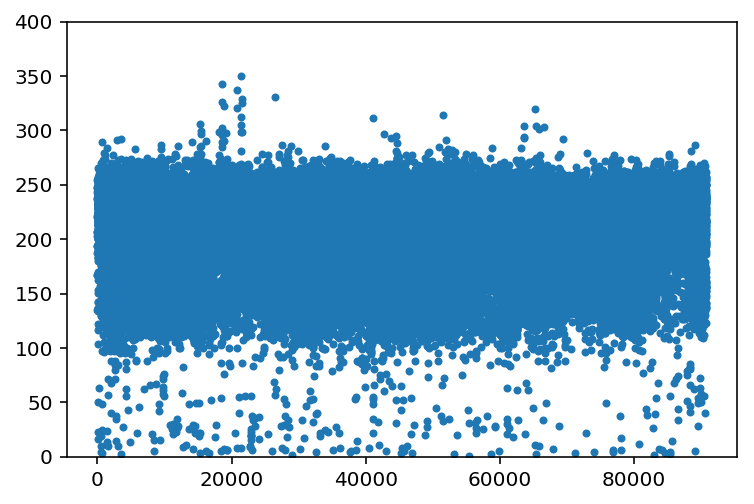

In [38]:
plt.plot(data.Measured_Tonnes,'.')
plt.ylim(0,400)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90715 entries, 0 to 90714
Data columns (total 57 columns):
Site                          90715 non-null object
Reporting_Year                90715 non-null int64
Period_Code                   90715 non-null int64
Week_Code                     90715 non-null int64
Date                          90715 non-null datetime64[ns]
Shift_Name                    90715 non-null object
Crew_Name                     90715 non-null object
Loader_Personnel_No           90715 non-null int64
Truck_Personnel_No            90715 non-null int64
Loader                        90715 non-null object
Loader_Fleet                  90715 non-null object
Truck                         90715 non-null object
Truck_Fleet                   90715 non-null object
Material_Code                 90715 non-null object
Material_Class_Description    90715 non-null object
Material_Group_Description    90715 non-null object
Material_Grade_Name           90714 non-null object
Dig_

# Measured Tonnes

In [40]:
data = data[data.Measured_Tonnes >30]

In [41]:
data.shape

(85603, 57)

In [42]:
data.drop("Loader_Passes",axis=1, inplace=True)

In [43]:
data.dropna().shape

(81562, 56)

In [44]:
data = data.dropna()

In [45]:
data.head()

,Site,Reporting_Year,Period_Code,Week_Code,Date,Shift_Name,Crew_Name,Loader_Personnel_No,Truck_Personnel_No,Loader,Loader_Fleet,Truck,Truck_Fleet,Material_Code,Material_Class_Description,Material_Group_Description,Material_Grade_Name,Dig_Location,Src_Location,Src_Location_Type,Destination_Location,Dest_Location_Type,Figure_Type_Code,Load_Tonnes,Load_Volume,Load_Count,Measured_Tonnes,Measured_Count,Time_Depart,Time_Arrive,Time_Spotting,Time_Haul,Time_Load,Time_Dump,Time_Queing,Time_Empty,Time_End_Cycle,Full_Cycle_Duration,Travel_Full_Duration,Travel_Empty_Duration,Load_Duration,Load_Queue_Duration,Load_Spot_Duration,Dump_Queue_Duration,Dump_Duration,Travel_Distance,Travel_Distance_Hauling,Load_Northing,Load_Easting,Load_Elevation,Dump_Northing,Dump_Easting,Dump_Elevation,SRC_Reference,Source_Record_Updated,Date_Last_Refreshed
0,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,221.0,1,2018-04-02 18:47:04,2018-04-02 18:53:19,2018-04-02 18:56:03,2018-04-02 18:58:40,2018-04-02 18:56:37,2018-04-02 19:09:07,2018-04-02 19:09:02,2018-04-02 19:09:28,2018-04-02 19:10:20,1396.0,622.0,375.0,123.0,164.0,34.0,5.0,73.0,5884.0,5196.0,7.454651e+06,677828.1295,195.20,7.452294e+06,680554.9651,203.79,2929575.0,2018-04-02 19:10:25,2018-05-18 04:40:22.557
1,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,207.0,1,2018-04-02 19:10:20,2018-04-02 19:16:36,2018-04-02 19:23:26,2018-04-02 19:26:10,2018-04-02 19:23:49,2018-04-02 19:37:01,2018-04-02 19:35:52,2018-04-02 19:37:17,2018-04-02 19:38:14,1674.0,582.0,376.0,141.0,410.0,23.0,69.0,73.0,5884.0,5196.0,7.454653e+06,677825.2513,203.70,7.452296e+06,680558.0666,203.50,2929597.0,2018-04-02 19:38:15,2018-05-18 04:40:22.557
2,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,248.0,1,2018-04-02 21:07:45,2018-04-02 21:17:30,2018-04-02 21:21:43,2018-04-02 21:23:35,2018-04-02 21:22:00,2018-04-02 21:34:20,2018-04-02 21:34:15,2018-04-02 21:34:34,2018-04-02 21:35:31,1666.0,640.0,585.0,95.0,253.0,17.0,5.0,71.0,5196.0,5196.0,7.454631e+06,677810.8061,206.40,7.452320e+06,680582.6195,209.20,2929675.0,2018-04-02 21:35:36,2018-05-18 04:40:22.557
3,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,254.0,1,2018-04-03 00:19:56,2018-04-03 00:29:16,2018-04-03 00:29:19,2018-04-03 00:32:04,2018-04-03 00:29:36,2018-04-03 00:42:32,2018-04-03 00:42:25,2018-04-03 00:42:43,2018-04-03 00:43:47,1431.0,621.0,560.0,148.0,3.0,17.0,7.0,75.0,5196.0,5196.0,7.454627e+06,677805.6260,194.59,7.452292e+06,680571.6905,196.70,2929766.0,2018-04-03 00:43:49,2018-05-18 04:40:22.557
4,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD553,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,243.0,1,2018-04-03 01:32:11,2018-04-03 01:51:31,2018-04-03 01:51:33,2018-04-03 01:53:14,2018-04-03 01:51:51,2018-04-03 02:03:10,2018-04-03 02:03:05,2018-04-03 02:03:35,2018-04-03 02:04:31,1940.0,591.0,1160.0,83.0,2.0,18.0,5.0,81.0,5318.0,5196.0,7.454618e+06,677817.6580,199.09,7.452281e+06,680575.1356,198.90,2929810.0,2018-04-03 02:04:40,2018-05-18 04:40:22.557


In [46]:
imp_param = ["Loader", "Truck", "Dig_Location", "Measured_Tonnes",
            "Full_Cycle_Duration","Travel_Full_Duration", "Travel_Empty_Duration", "Load_Duration","Load_Queue_Duration",
            "Load_Spot_Duration","Dump_Queue_Duration", "Dump_Duration" , "Travel_Distance", "Travel_Distance_Hauling",
            "Load_Elevation", "Dump_Elevation"]

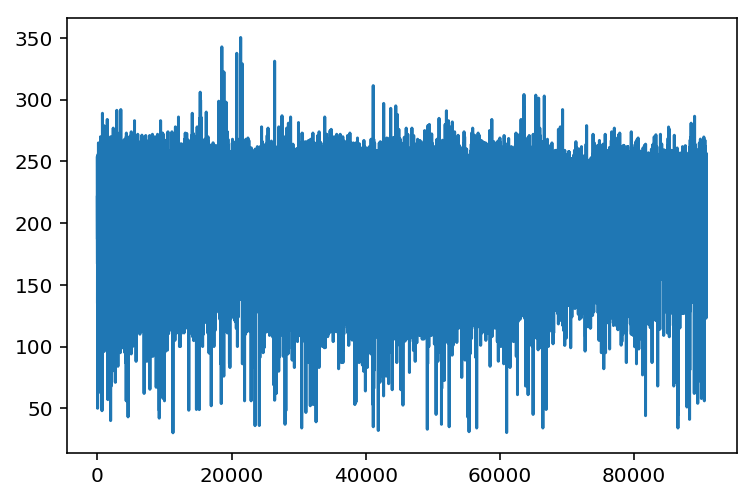

In [47]:
data["Measured_Tonnes"].plot()

In [51]:
data.head()

,Site,Reporting_Year,Period_Code,Week_Code,Date,Shift_Name,Crew_Name,Loader_Personnel_No,Truck_Personnel_No,Loader,Loader_Fleet,Truck,Truck_Fleet,Material_Code,Material_Class_Description,Material_Group_Description,Material_Grade_Name,Dig_Location,Src_Location,Src_Location_Type,Destination_Location,Dest_Location_Type,Figure_Type_Code,Load_Tonnes,Load_Volume,Load_Count,Measured_Tonnes,Measured_Count,Time_Depart,Time_Arrive,Time_Spotting,Time_Haul,Time_Load,Time_Dump,Time_Queing,Time_Empty,Time_End_Cycle,Full_Cycle_Duration,Travel_Full_Duration,Travel_Empty_Duration,Load_Duration,Load_Queue_Duration,Load_Spot_Duration,Dump_Queue_Duration,Dump_Duration,Travel_Distance_Hauling,Load_Northing,Load_Easting,Load_Elevation,Dump_Northing,Dump_Easting,Dump_Elevation,SRC_Reference,Source_Record_Updated,Date_Last_Refreshed
0,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,1300.364,1,2018-04-02 18:47:04,2018-04-02 18:53:19,2018-04-02 18:56:03,2018-04-02 18:58:40,2018-04-02 18:56:37,2018-04-02 19:09:07,2018-04-02 19:09:02,2018-04-02 19:09:28,2018-04-02 19:10:20,1396.0,622.0,375.0,123.0,164.0,34.0,5.0,73.0,5196.0,7.454651e+06,677828.1295,195.20,7.452294e+06,680554.9651,203.79,2929575.0,2018-04-02 19:10:25,2018-05-18 04:40:22.557
1,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,1217.988,1,2018-04-02 19:10:20,2018-04-02 19:16:36,2018-04-02 19:23:26,2018-04-02 19:26:10,2018-04-02 19:23:49,2018-04-02 19:37:01,2018-04-02 19:35:52,2018-04-02 19:37:17,2018-04-02 19:38:14,1674.0,582.0,376.0,141.0,410.0,23.0,69.0,73.0,5196.0,7.454653e+06,677825.2513,203.70,7.452296e+06,680558.0666,203.50,2929597.0,2018-04-02 19:38:15,2018-05-18 04:40:22.557
2,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,1288.608,1,2018-04-02 21:07:45,2018-04-02 21:17:30,2018-04-02 21:21:43,2018-04-02 21:23:35,2018-04-02 21:22:00,2018-04-02 21:34:20,2018-04-02 21:34:15,2018-04-02 21:34:34,2018-04-02 21:35:31,1666.0,640.0,585.0,95.0,253.0,17.0,5.0,71.0,5196.0,7.454631e+06,677810.8061,206.40,7.452320e+06,680582.6195,209.20,2929675.0,2018-04-02 21:35:36,2018-05-18 04:40:22.557
3,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD528,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,1319.784,1,2018-04-03 00:19:56,2018-04-03 00:29:16,2018-04-03 00:29:19,2018-04-03 00:32:04,2018-04-03 00:29:36,2018-04-03 00:42:32,2018-04-03 00:42:25,2018-04-03 00:42:43,2018-04-03 00:43:47,1431.0,621.0,560.0,148.0,3.0,17.0,7.0,75.0,5196.0,7.454627e+06,677805.6260,194.59,7.452292e+06,680571.6905,196.70,2929766.0,2018-04-03 00:43:49,2018-05-18 04:40:22.557
4,CAPCOAL,2018,201804,201814,2018-04-02,Night,Production C,464701622,464996763,EX302,RH340,RD553,Komatsu 830E AC,Overburden,Waste,Overburden,X1_18_S_OB,X1_18_S,X1,Dig Loc.,BAR_DUMP,Dump,ACTUAL,218.5,95.0,1,1292.274,1,2018-04-03 01:32:11,2018-04-03 01:51:31,2018-04-03 01:51:33,2018-04-03 01:53:14,2018-04-03 01:51:51,2018-04-03 02:03:10,2018-04-03 02:03:05,2018-04-03 02:03:35,2018-04-03 02:04:31,1940.0,591.0,1160.0,83.0,2.0,18.0,5.0,81.0,5196.0,7.454618e+06,677817.6580,199.09,7.452281e+06,680575.1356,198.90,2929810.0,2018-04-03 02:04:40,2018-05-18 04:40:22.557


In [49]:
data["Travel_Distance"] = data["Travel_Distance"] /1000
data["Measured_Tonnes"] = data["Measured_Tonnes"] * data["Travel_Distance"]
data.drop("Travel_Distance", axis =1, inplace = True)

In [50]:
np.sum(data.Measured_Tonnes>230)

75705

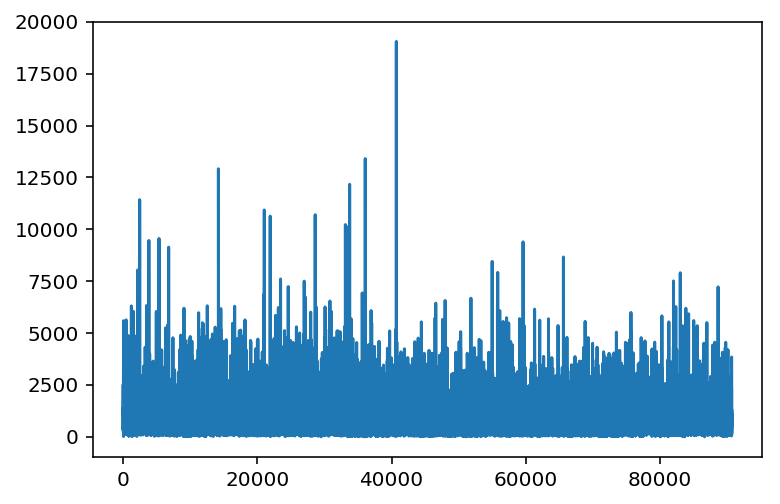

In [52]:
data["Measured_Tonnes"].plot()

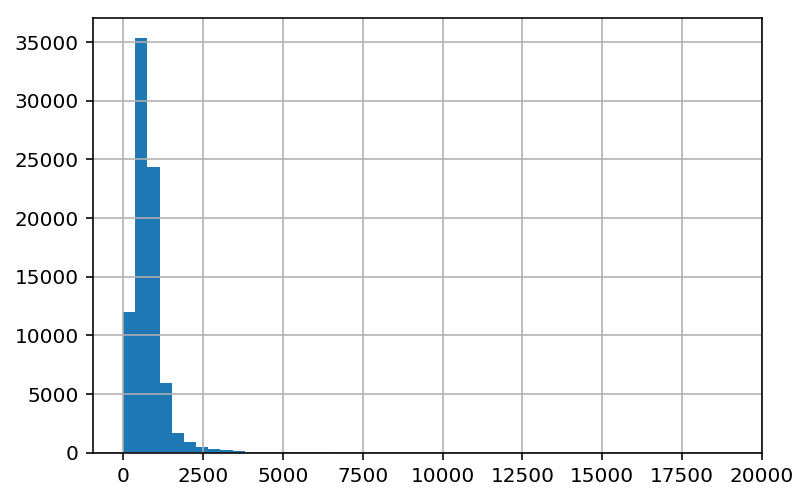

In [61]:
data.Measured_Tonnes.hist(bins = 50)

In [56]:
np.sum(data.Measured_Tonnes>1000)

16110

In [62]:
data["pred"] = data.Measured_Tonnes>1000

In [63]:
data["pred"].value_counts()

False    65452
True     16110
Name: pred, dtype: int64

In [64]:
data.Dig_Location.value_counts()

X2_18_S         29555
X4_19_N         21314
X2_19_N          7532
X2_18_N          4664
X2_17_N          3764
X2_17_S_B        3093
X2_19_S          3079
X2_17_S          3001
X1_18_S          2215
X3_17_N          1418
X2_17_S_TRIM     1221
X3_17_S           431
X3_MAIN_ACC       140
X4_19_S           135
Name: Dig_Location, dtype: int64

In [65]:
data.Shift_Name.value_counts()

Night    42590
Day      38972
Name: Shift_Name, dtype: int64

In [66]:
data.Crew_Name.value_counts()

Production D     21064
Production C     20462
Production A     17518
Production B     15064
Not Available     7454
Name: Crew_Name, dtype: int64

In [67]:
imp_param = imp_param + ["pred"]

In [82]:
imp_param = ['Loader',
 'Truck',
 'Dig_Location',
 'Measured_Tonnes',
 'Full_Cycle_Duration',
 'Travel_Full_Duration',
 'Load_Duration',
 'Load_Queue_Duration',
 'Load_Spot_Duration',
 'Dump_Queue_Duration',
 'Dump_Duration',
 'Travel_Distance_Hauling',
 'Load_Elevation',
 'Dump_Elevation',
 'pred']

In [83]:
d = data[imp_param]

In [84]:
train_cats(d)

In [85]:
d.drop("Measured_Tonnes", axis = 1, inplace = True)

In [86]:
df_trn, y_trn, nas = proc_df(d, "pred")

In [87]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(d, n_trn)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_valid, y_train, y_valid = train_test_split(df_trn, y_trn)

In [90]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
def print_score(m):
    res = [accuracy_score(y_train, m.predict(X_train)),accuracy_score(y_valid, m.predict(X_valid)) ]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [93]:
m = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.95712020401824394, 0.90652738953459855, 0.90191430579849929]


In [94]:
fi = rf_feat_importance(m, df_trn); fi[:15]

,cols,imp
3,Full_Cycle_Duration,0.326776
10,Travel_Distance_Hauling,0.231498
11,Load_Elevation,0.057575
4,Travel_Full_Duration,0.055681
9,Dump_Duration,0.053007
12,Dump_Elevation,0.049484
6,Load_Queue_Duration,0.043732
5,Load_Duration,0.043347
1,Truck,0.033251
2,Dig_Location,0.033061


In [95]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

Text(0.5,1,'Important Indicators for differentiating top performing operators')

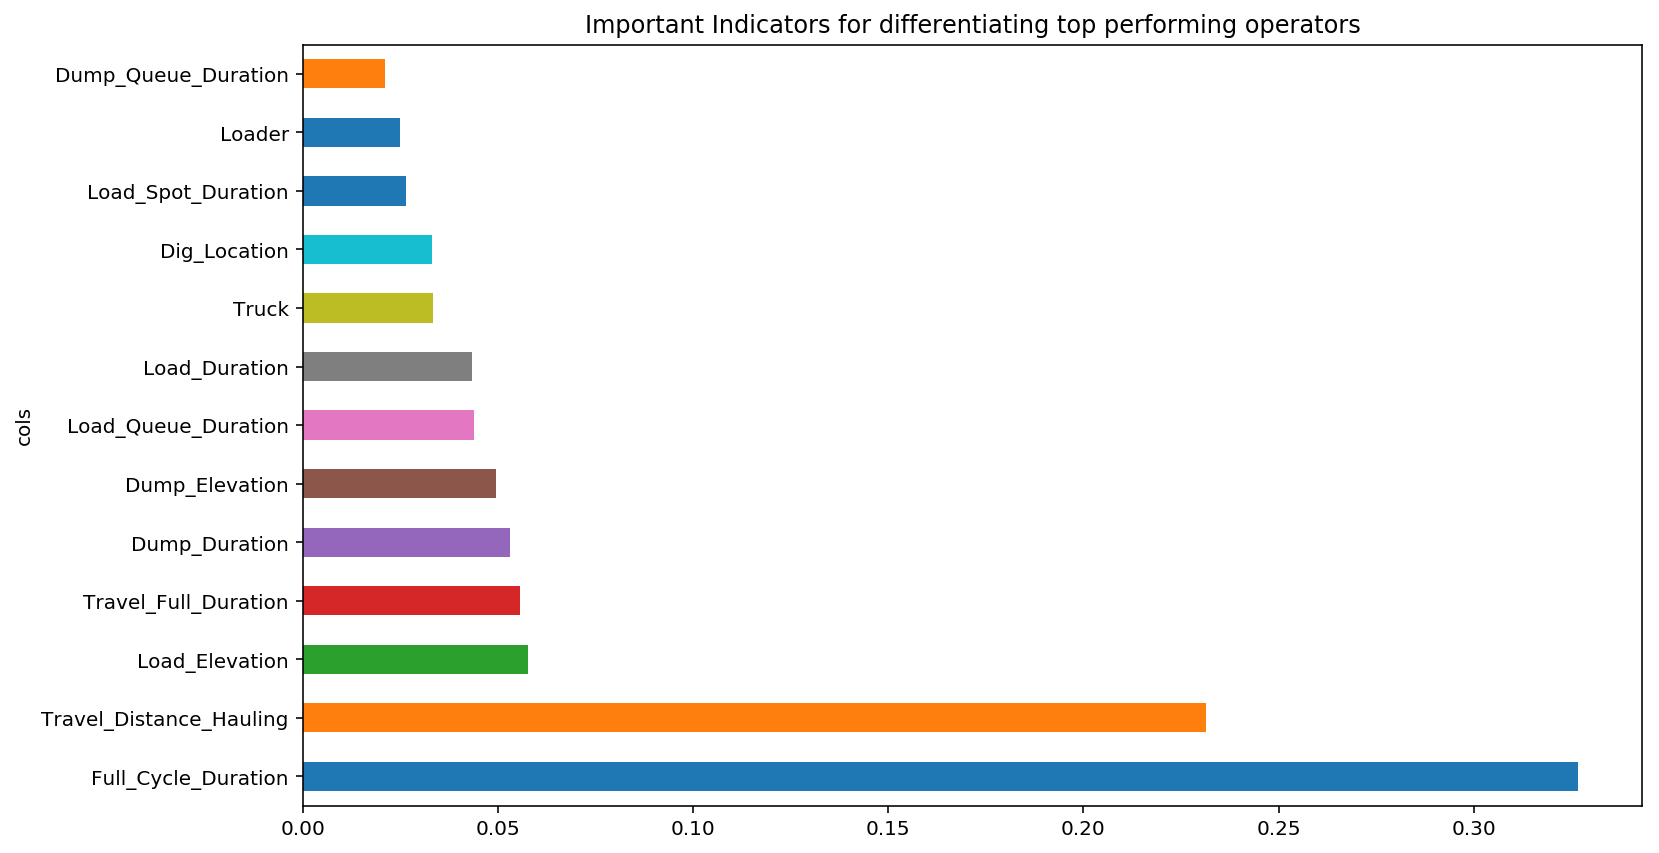

In [96]:
plot_fi(fi[:18]);
plt.title("Important Indicators for differentiating top performing operators")

In [159]:
data.Truck.value_counts()

RD558    3748
RD538    3547
RD526    3538
RD529    3498
RD553    3452
RD715    3414
RD528    3398
RD559    3346
RD527    3204
RD537    3176
RD711    2983
RD531    2887
RD536    2884
RD707    2814
RD532    2771
RD539    2598
RD533    2597
RD713    2451
RD534    2443
RD525    2347
RD705    2328
RD710    2316
RD704    2234
RD530    2225
RD714    2180
RD706    1937
RD535    1875
RD708    1694
RD709    1687
RD712    1563
RD401     149
RD406     127
RD514      69
RD515      61
RD513      21
Name: Truck, dtype: int64

In [98]:
d.columns

Index(['Loader', 'Truck', 'Dig_Location', 'Full_Cycle_Duration',
       'Travel_Full_Duration', 'Load_Duration', 'Load_Queue_Duration',
       'Load_Spot_Duration', 'Dump_Queue_Duration', 'Dump_Duration',
       'Travel_Distance_Hauling', 'Load_Elevation', 'Dump_Elevation', 'pred'],
      dtype='object')

# Full Cycle Duration

Text(0.5,1,'Full Cycle Duration: Top Performing vs Others')

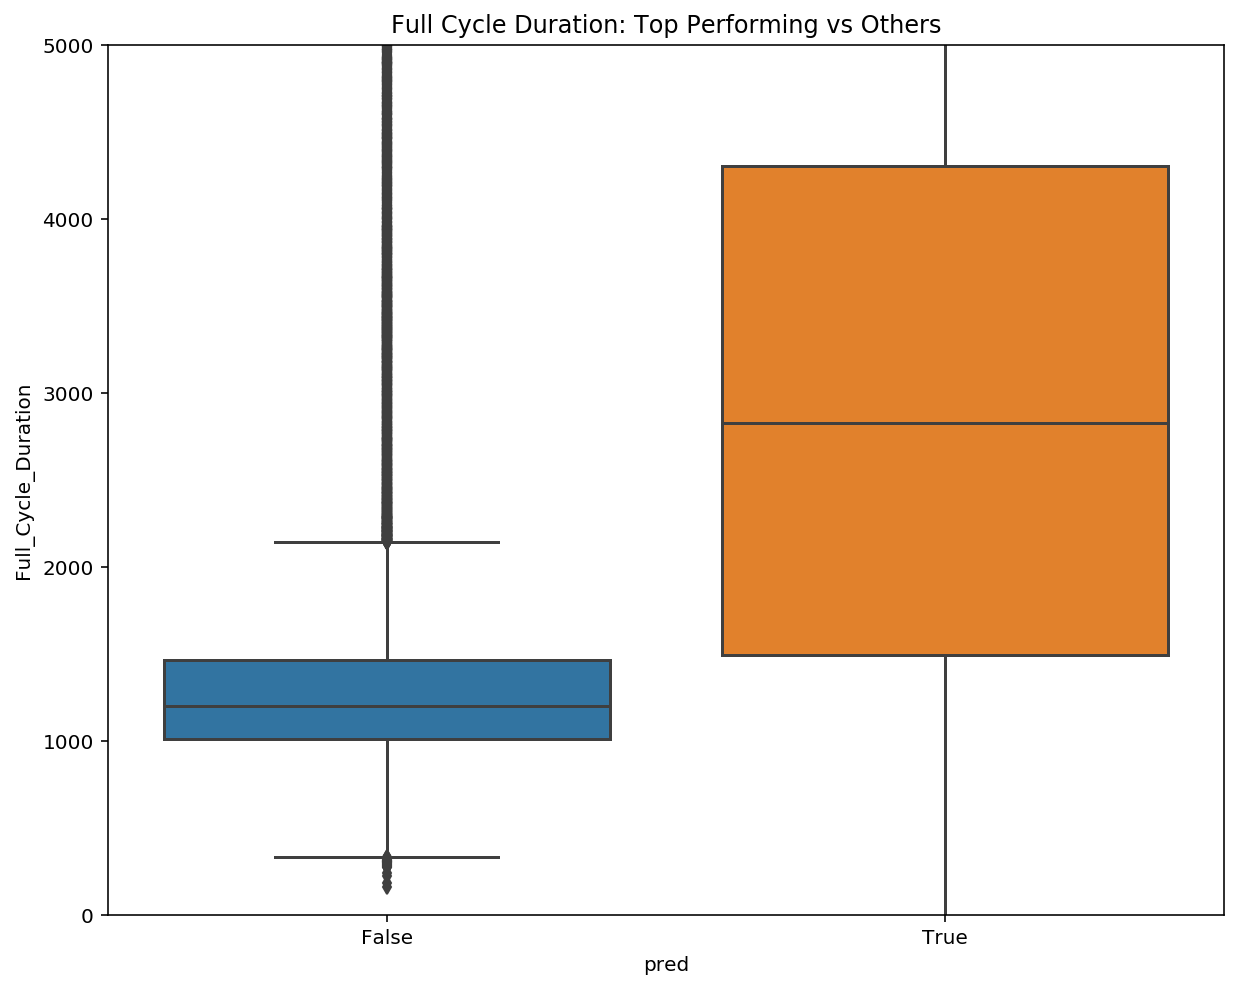

In [124]:
plt.figure(figsize =(10,8))
sns.boxplot(x = "pred", y = 'Full_Cycle_Duration', data = d)
plt.ylim(0,5000)
plt.title("Full Cycle Duration: Top Performing vs Others")

# Travel Distance Hauling

Text(0.5,1,'Travel_Distance_Hauling: Top Performing vs Others')

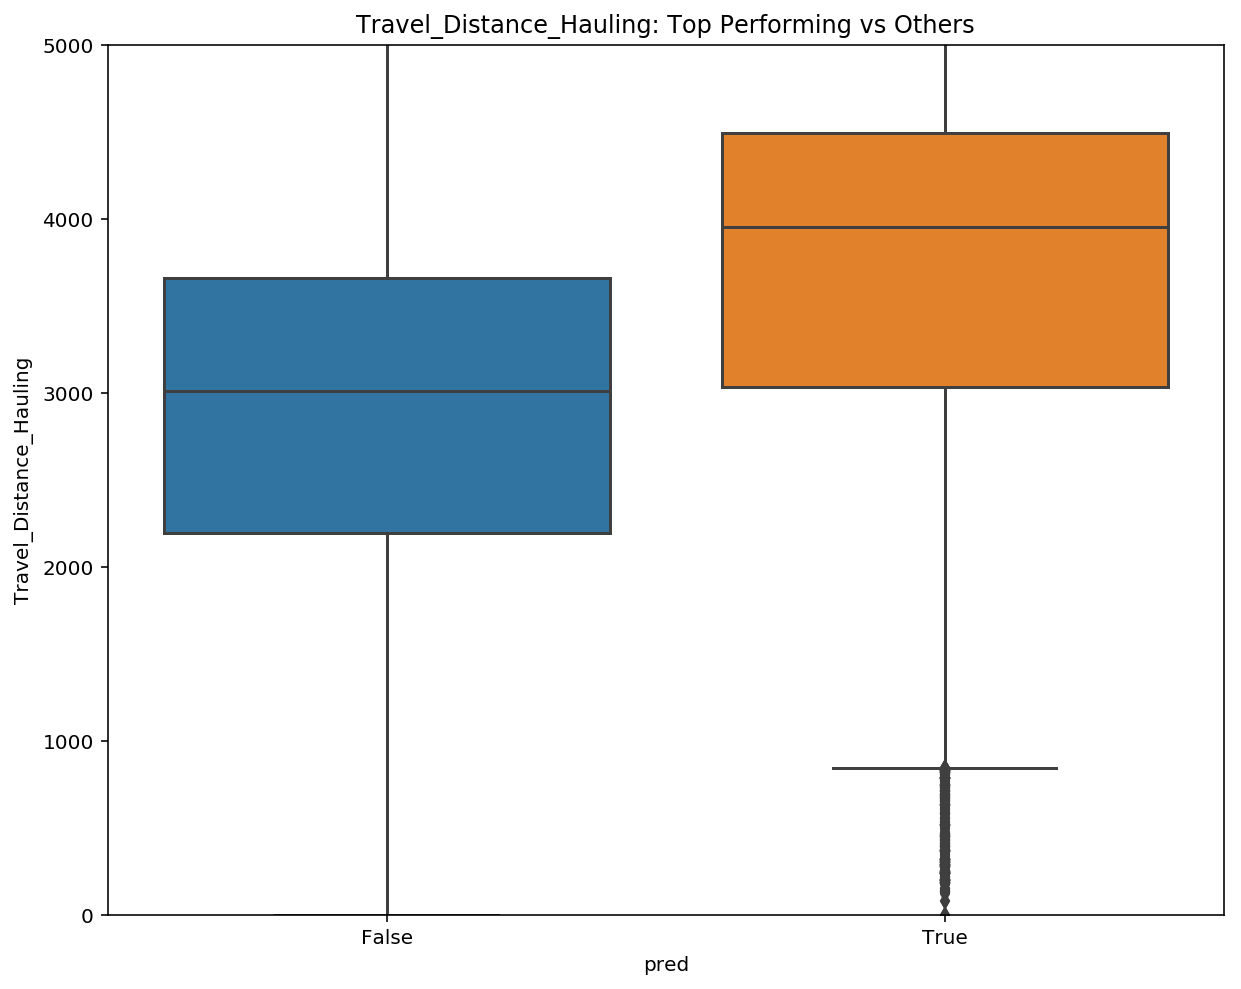

In [123]:
plt.figure(figsize =(10,8))
sns.boxplot(x = "pred", y = 'Travel_Distance_Hauling', data = d)
plt.ylim(0,5000)
plt.title("Travel_Distance_Hauling: Top Performing vs Others")

# Load Duration

Text(0.5,1,'Load Duration: Top Performing vs Others')

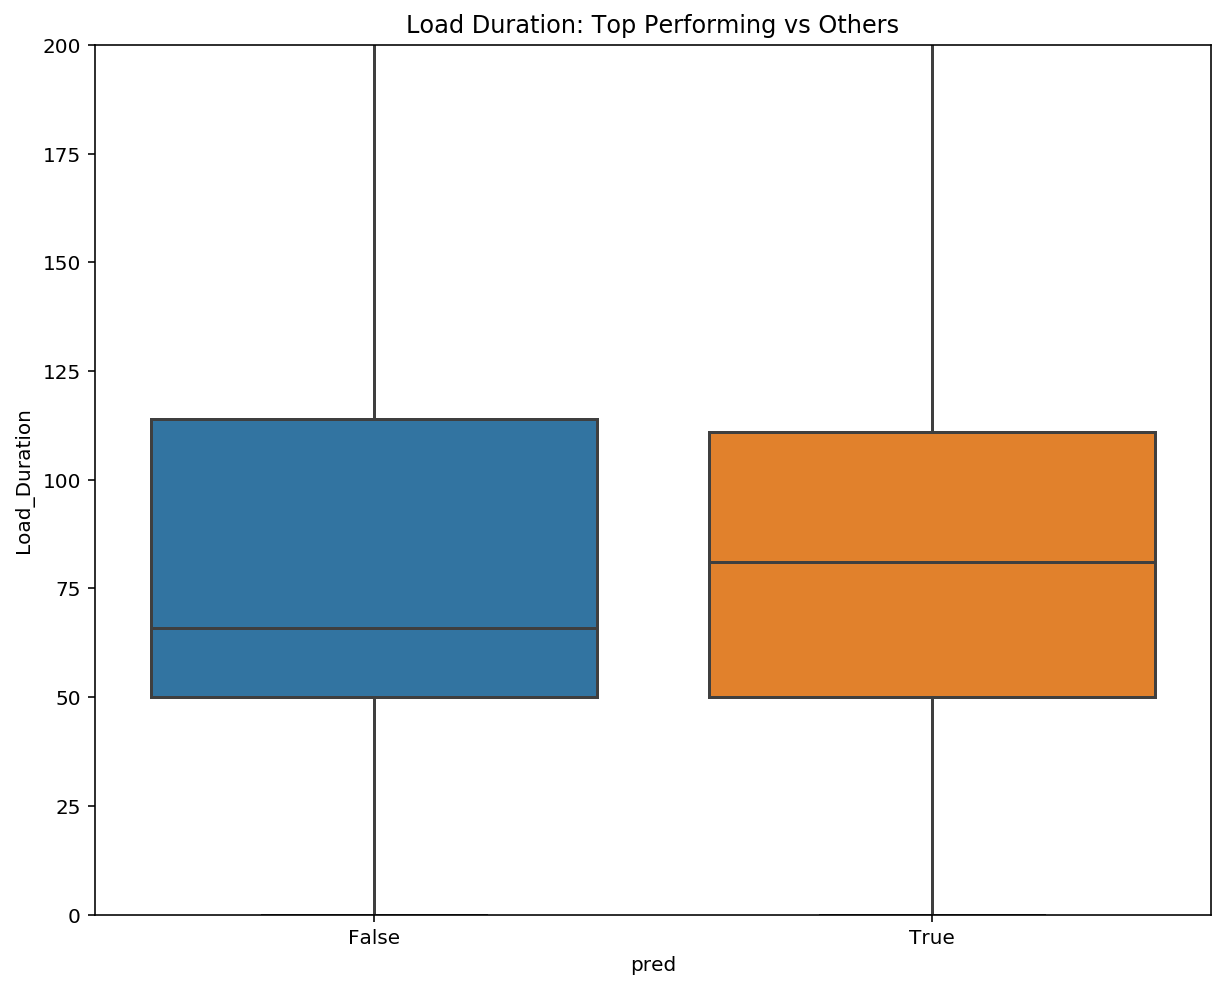

In [122]:
plt.figure(figsize =(10,8))
sns.boxplot(x = "pred", y = 'Load_Duration', data = d)
plt.ylim(0,200)
plt.title("Load Duration: Top Performing vs Others")

#  'Load_Queue_Duration'

Text(0.5,1,'Load_Queue_Duration: Top Performing vs Others')

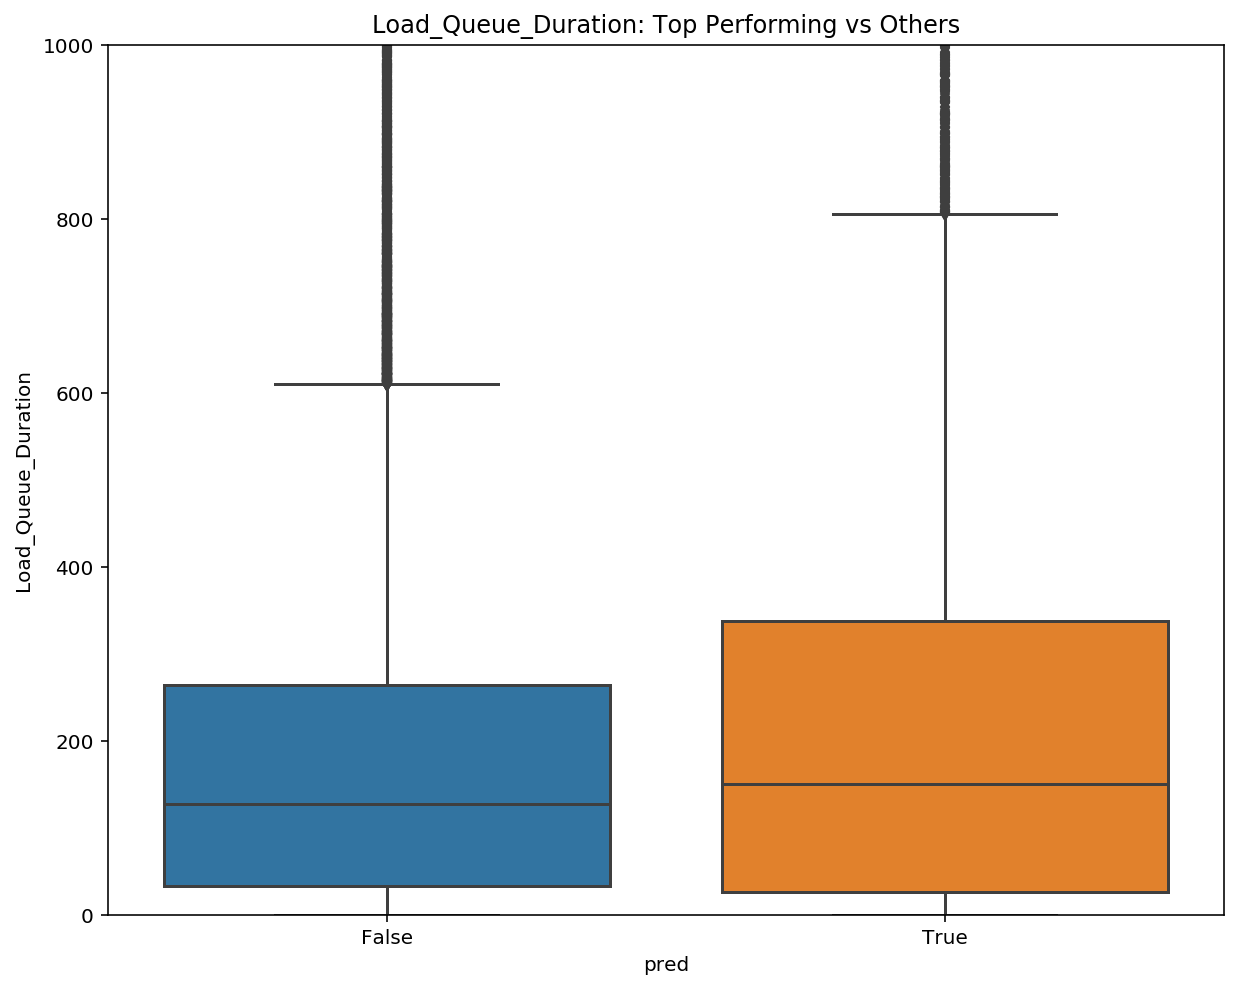

In [121]:
plt.figure(figsize =(10,8))
sns.boxplot(x = "pred", y = 'Load_Queue_Duration', data = d)
plt.ylim(0,1000)
plt.title("Load_Queue_Duration: Top Performing vs Others")

# Load_Spot_Duration

Text(0.5,1,'Load_Queue_Duration: Top Performing vs Others')

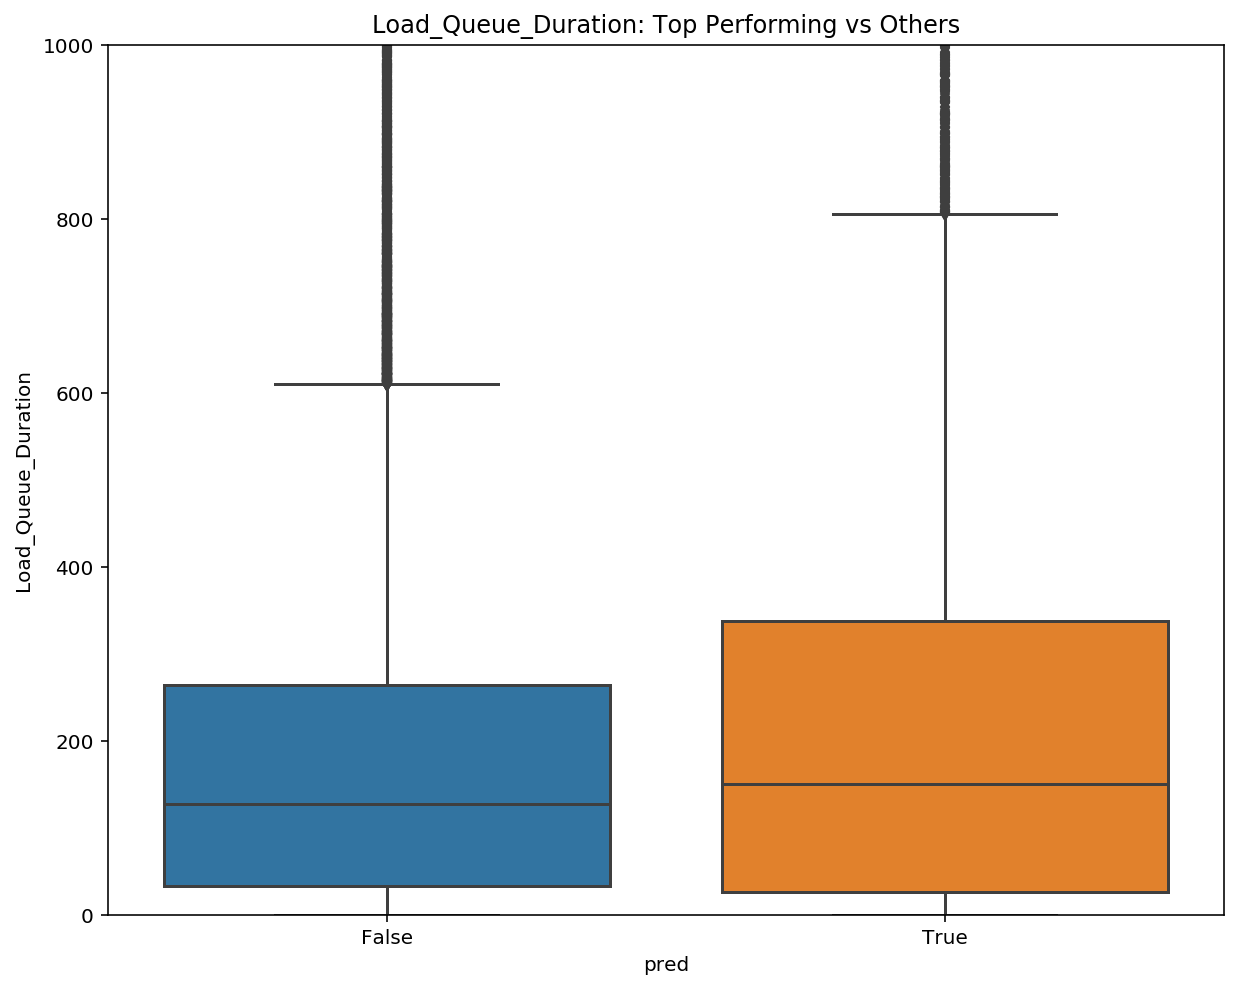

In [120]:
plt.figure(figsize =(10,8))
sns.boxplot(x = 'pred', y = 'Load_Queue_Duration', data = d)
plt.ylim(0,1000)
plt.title("Load_Queue_Duration: Top Performing vs Others")

# 'Load_Elevation'

Text(0.5,1,'Load_Queue_Duration: Top Performing vs Others')

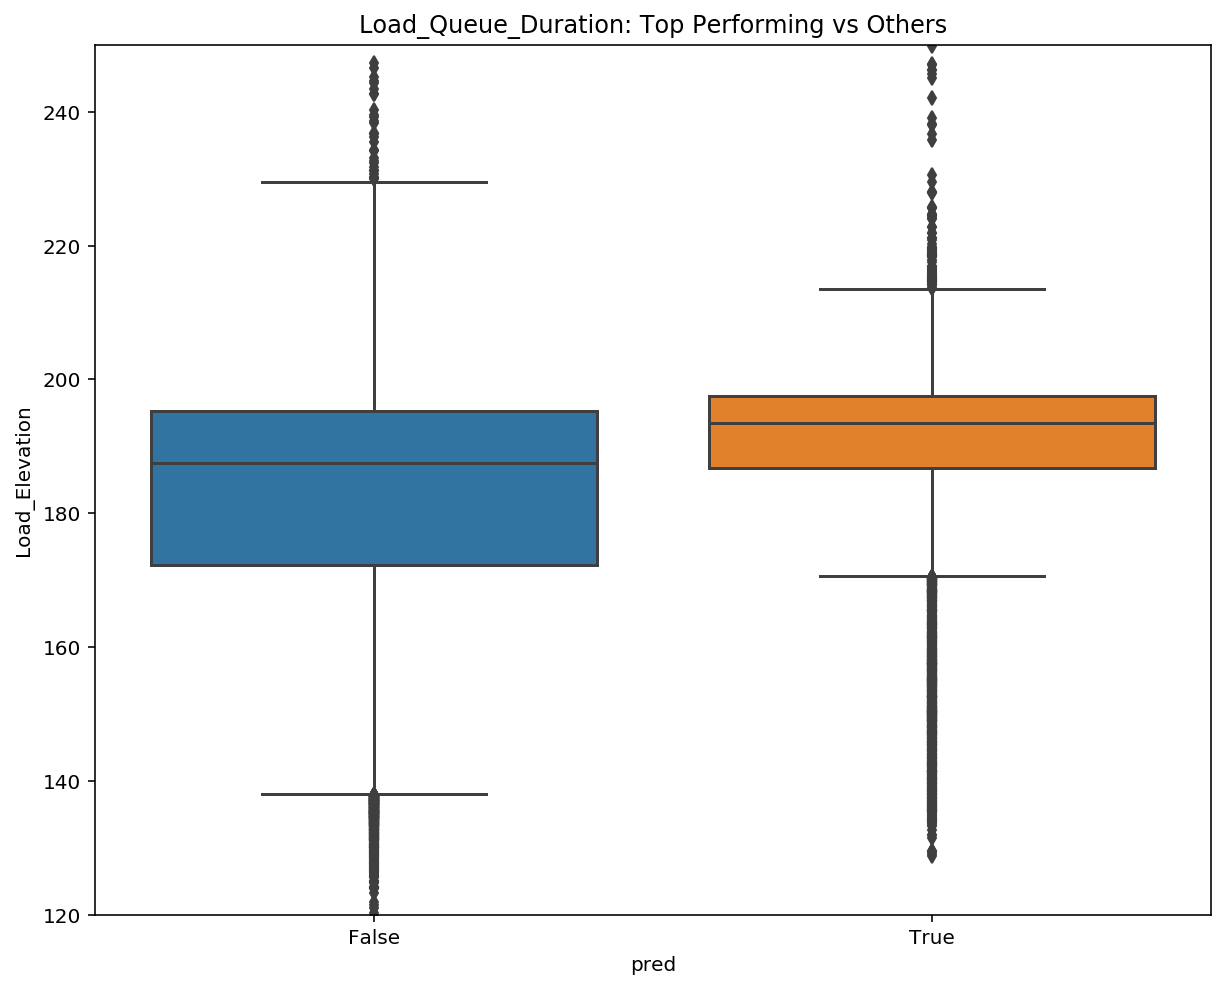

In [119]:
plt.figure(figsize =(10,8))
sns.boxplot(x = 'pred', y = 'Load_Elevation', data = d)
plt.ylim(120,250)
plt.title("Load_Queue_Duration: Top Performing vs Others")

In [128]:
data.columns

Index(['Site', 'Reporting_Year', 'Period_Code', 'Week_Code', 'Date',
       'Shift_Name', 'Crew_Name', 'Loader_Personnel_No', 'Truck_Personnel_No',
       'Loader', 'Loader_Fleet', 'Truck', 'Truck_Fleet', 'Material_Code',
       'Material_Class_Description', 'Material_Group_Description',
       'Material_Grade_Name', 'Dig_Location', 'Src_Location',
       'Src_Location_Type', 'Destination_Location', 'Dest_Location_Type',
       'Figure_Type_Code', 'Load_Tonnes', 'Load_Volume', 'Load_Count',
       'Measured_Tonnes', 'Measured_Count', 'Time_Depart', 'Time_Arrive',
       'Time_Spotting', 'Time_Haul', 'Time_Load', 'Time_Dump', 'Time_Queing',
       'Time_Empty', 'Time_End_Cycle', 'Full_Cycle_Duration',
       'Travel_Full_Duration', 'Travel_Empty_Duration', 'Load_Duration',
       'Load_Queue_Duration', 'Load_Spot_Duration', 'Dump_Queue_Duration',
       'Dump_Duration', 'Travel_Distance_Hauling', 'Load_Northing',
       'Load_Easting', 'Load_Elevation', 'Dump_Northing', 'Dump_Easting',


In [130]:
load_personnel_avg = data.pivot_table(index="Loader_Personnel_No", values="Measured_Tonnes", aggfunc=np.sum)

load_personnel_avg = pd.DataFrame(data = load_personnel_avg.values, index=load_personnel_avg.index, columns=["Tonnes"])

In [133]:
oprid_sorted = load_personnel_avg.sort_values(by = "Tonnes", ascending=False)
oprid_sorted_20 = oprid_sorted[:20]
oprid_sorted_20

,Tonnes
Loader_Personnel_No,
1222991,4.428367e+06
468390923,3.821024e+06
464701622,3.619166e+06
471894808,3.121697e+06
473220440,3.037810e+06
1395317,2.984757e+06
464450602,2.912727e+06
465044734,2.821738e+06
471974965,2.782113e+06


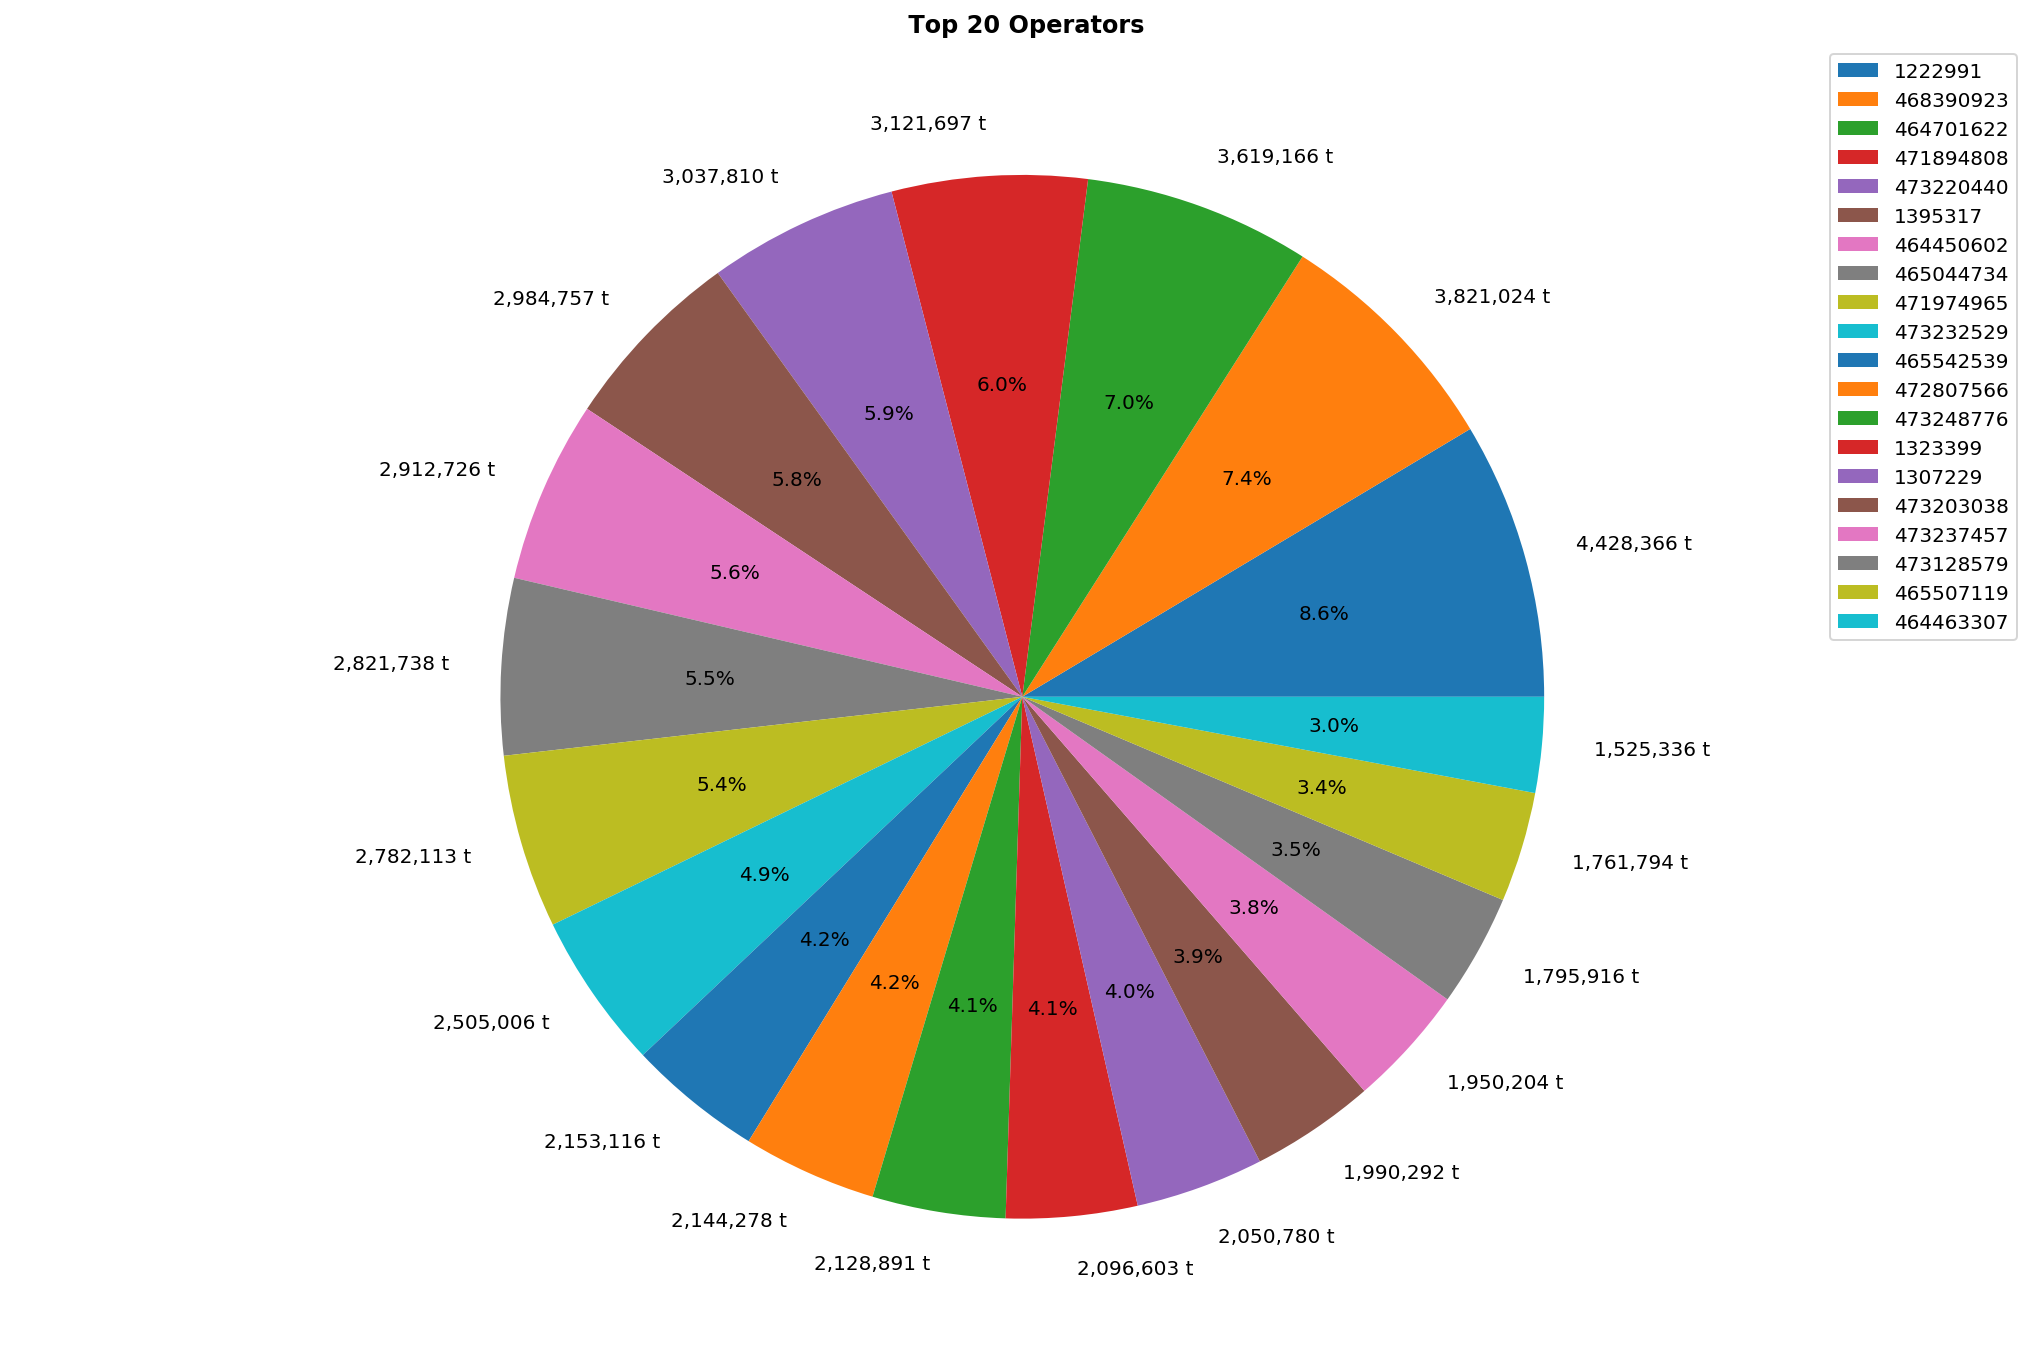

In [136]:
fig = plt.figure(1, figsize=(18,12))
ax = fig.add_subplot(111)
ax.axis('equal')
labels = oprid_sorted_20.index
sizes = oprid_sorted_20.Tonnes
new_sizes = []
for val in sizes:
    v = str("{:,}".format(int(val)) )+" t"
    new_sizes.append(v)
patches, texts, autotexts = ax.pie(sizes,  labels=new_sizes, autopct='%1.1f%%')
ax.legend(labels, loc = "best")
ax.set_title(" Top 20 Operators", fontweight = "bold")
plt.show()

In [125]:
d.groupby("pred")["Load_Elevation"].mean()

pred
False    179.747844
True     189.053394
Name: Load_Elevation, dtype: float64

In [126]:
d.groupby("pred")["Load_Duration"].mean()

pred
False    88.959344
True     84.253383
Name: Load_Duration, dtype: float64

In [127]:
d.groupby("pred")["Load_Spot_Duration"].mean()

pred
False    42.550923
True     41.384171
Name: Load_Spot_Duration, dtype: float64